# Classificação de Qualidade de Vinhos - Naive Bayes

- Possuimos 2 datasets com vinhos tintos e brancos do norte de Portugal. O objetivo é fazer uma previsão da qualidade do vinho baseado nos testes químicos feitos
- Usaremos o algoritmo de Naive Bayes para classificar os vinhos.

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Pré-processamento

### Base de Dados - Red Wine

In [2]:
base_red_wine = pd.read_csv('./wine_quality/winequality-red.csv', sep=';')
base_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
base_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
base_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Visualização dos Dados

In [5]:
np.unique(base_red_wine['quality'], return_counts=True)

(array([3, 4, 5, 6, 7, 8], dtype=int64),
 array([ 10,  53, 681, 638, 199,  18], dtype=int64))

<Axes: xlabel='quality', ylabel='count'>

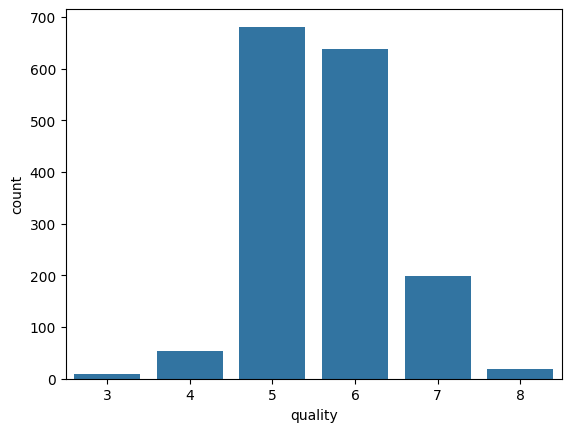

In [6]:
sns.countplot(x=base_red_wine['quality'])

### Divisão entre Previsores e Classe

In [7]:
# previsores
x_red_wine = base_red_wine.iloc[:, 0:11].values
x_red_wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [8]:
x_red_wine[0]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ])

In [9]:
# classe
y_red_wine = base_red_wine.iloc[:, 11].values
y_red_wine

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [10]:
x_red_wine.shape

(1599, 11)

### Escalonamento de Valores

In [11]:
# O ESCALONAMENTO ABAIXOU EM 0.5% A PRECISÃO DO NAIVE BAYES

from sklearn.preprocessing import StandardScaler
scaler_redwine = StandardScaler()
x_red_wine = scaler_redwine.fit_transform(x_red_wine)

In [12]:
x_red_wine[0]

array([-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
       -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
       -0.96024611])

### Divisão entre Treinamento e Teste

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_redwine_train, X_redwine_test, y_redwine_train, y_redwine_test = train_test_split(x_red_wine, y_red_wine, test_size=0.25, random_state=0)

In [15]:
X_redwine_train.shape, y_redwine_train.shape

((1199, 11), (1199,))

In [16]:
X_redwine_test.shape, y_redwine_test.shape

((400, 11), (400,))

### Salvar Variáveis

In [17]:
import pickle
with open('redwine.pkl', mode='wb') as f:
    pickle.dump([X_redwine_train, y_redwine_train, X_redwine_test, y_redwine_test], f)

## Aplicação do Algoritmo Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
naive_redwine = GaussianNB()
naive_redwine.fit(X_redwine_train, y_redwine_train)

GaussianNB()

In [20]:
previsoes = naive_redwine.predict(X_redwine_test)
previsoes

array([5, 5, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 6, 6, 5, 6, 5,
       6, 6, 6, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 8, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 6, 7, 5, 6, 6, 7, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 7, 6, 6, 5, 4, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 7, 5, 7, 6, 5, 6, 7, 6, 6, 7, 6, 5, 6, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 6, 4, 5, 7, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 7, 5, 7, 4, 7, 6, 6, 5, 5, 5, 5, 6, 7, 7, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 8, 5, 6, 7, 5, 5, 7, 6, 7,
       6, 8, 6, 5, 5, 8, 5, 7, 8, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 7, 4, 7, 5, 5, 6, 6, 6, 5,
       5, 6, 8, 6, 5, 7, 7, 6, 5, 5, 5, 6, 3, 6, 7, 6, 7, 7, 8, 7, 5, 4,
       5, 5, 6, 5, 6, 5, 4, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 8, 5, 6,
       5, 5, 5, 5, 5, 7, 6, 6, 6, 6, 7, 6, 7, 5, 7, 7, 5, 7, 6, 6, 6, 5,
       6, 5, 7, 6, 6, 4, 6, 5, 5, 6, 5, 6, 5, 5, 6,

In [21]:
y_redwine_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

## Visualização dos Resultados

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
print(f'Percentual de Acertos: {accuracy_score(y_redwine_test, previsoes):.2%}')

Percentual de Acertos: 54.50%


In [24]:
confusion_matrix(y_redwine_test, previsoes)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   8,   6,   0,   0],
       [  3,   7, 110,  41,   8,   0],
       [  0,   4,  42,  85,  34,   5],
       [  1,   0,   0,  13,  23,   3],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

In [25]:
from yellowbrick.classifier import ConfusionMatrix

0.545

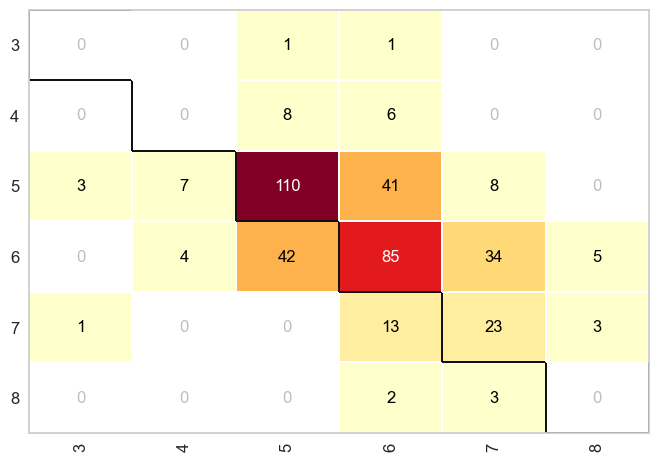

In [26]:
cm = ConfusionMatrix(naive_redwine)
cm.fit(X_redwine_train, y_redwine_train)
cm.score(X_redwine_test, y_redwine_test)

In [27]:
print(classification_report(y_redwine_test, previsoes))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.68      0.65      0.67       169
           6       0.57      0.50      0.53       170
           7       0.34      0.57      0.43        40
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.27      0.29      0.27       400
weighted avg       0.57      0.55      0.55       400



### O Algoritmo Naive Bayes não se mostrou muito eficiente para a solução deste problema, com uma precisão de apenas 54.5%.